In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve

from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler, Normalizer

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
#
from C45 import C45Classifier
#
from sklearn.linear_model import LogisticRegression as LR

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.svm import SVR

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from pathlib import Path

import pickle

import time
import datetime

In [14]:
#path = Path.cwd().joinpath('malicious-features').joinpath('features_1k.csv')
path = 'train_1m.csv'
data_1 = pd.read_csv(path, encoding = "ISO-8859-1")

# Split the data into input and output variables
X = data_1.iloc[1:, 0:10].values   # Input features
Y = data_1.iloc[1:, 10].values     # Output (capacity)

In [16]:
X_norm = Normalizer().fit_transform(X)

minmaxScaler = MinMaxScaler()
X_minmax = minmaxScaler.fit_transform(X)

X_std = StandardScaler(with_mean=False, with_std=False).fit_transform(X)
X_maxabs = MaxAbsScaler().fit_transform(X)
X_rob = RobustScaler(with_centering=True).fit_transform(X)

std_train_x, std_test_x, std_train_y, std_test_y = train_test_split(X_std, Y, test_size=0.2, random_state=42)
minmax_train_x, minmax_test_x, minmax_train_y, minmax_test_y = train_test_split(X_minmax, Y, test_size=0.2, random_state=42)
maxabs_train_x, maxabs_test_x, maxabs_train_y, maxabs_test_y = train_test_split(X_maxabs, Y, test_size=0.2, random_state=42)
rob_train_x, rob_test_x, rob_train_y, rob_test_y = train_test_split(X_rob, Y, test_size=0.2, random_state=42)

norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
# Set up a cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
def get_cross_val_score(mdl, x, y):
  scores = cross_val_score(mdl, x, y, cv=kf, scoring='neg_mean_squared_error')
  return np.sqrt(-scores) # convert to RMSE

def print_boxplot(scores,title):
  # Generate a boxplot of the scores
  plt.boxplot(scores)
  plt.title(title + ' Cross-Validation Results')
  plt.xlabel('Model')
  plt.ylabel('RMSE')
  plt.show()
  return

In [19]:
curX =    rob_train_x
curY =    rob_train_y
curTestX =  rob_test_x
curTestY =  rob_test_y

In [21]:
# C4.5
c45 = C45Classifier()
c45.fit(train_x,train_y)
starttime = time.time()
c45.summary()
#print(c45.score(train_x,train_y))
y_pred_c45 = np.array(c45.predict(test_x))

Decision Tree Classifier Summary
Number of Instances   :  7999
Number of Attributes  :  10
Number of Leaves      :  2087
Number of Rules       :  2087
Tree Depth            :  9


Evaluation result: 
Total accuracy:  0.9982497812226528
Accuracy  0 :  0.9978887045694466
Accuracy  1 :  1.0


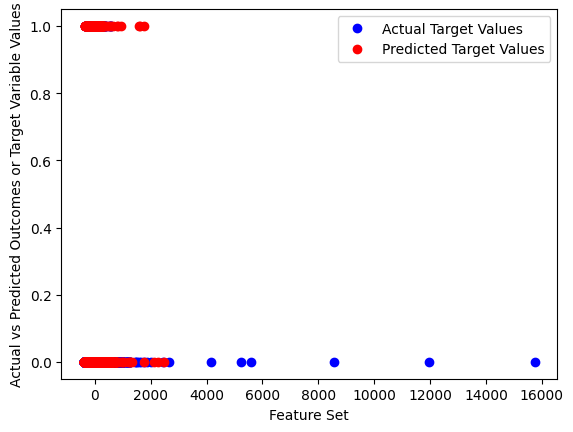

In [26]:
c45.evaluate(train_x,train_y)
stoptime = time.time()
sumtime = stoptime - starttime
#plt.plot(train_x,train_y,'bo')
#plt.plot(test_x,y_pred_c45,'ro')
#plt.show()
plt.plot(train_x, train_y, 'bo', label='Actual Target Values')
plt.plot(test_x, y_pred_c45, 'ro', label='Predicted Target Values')
plt.xlabel('Feature Set')
plt.ylabel('Actual vs Predicted Outcomes or Target Variable Values')
plt.legend(handles=[
    plt.Line2D([], [], color='blue', marker='o', linestyle='None', label='Actual Target Values'),
    plt.Line2D([], [], color='red', marker='o', linestyle='None', label='Predicted Target Values')
])
plt.show()

In [ ]:
pickle.dump(c45, open('c45_f.mdl', "wb"))

In [32]:
# CTree
clf = tree.DecisionTreeClassifier(criterion='entropy')  #'entropy' or 'gini'
clf.fit(train_x,train_y)
starttime = time.time()
print(clf.score(train_x,train_y))
y_pred_clf = clf.predict(test_x)

0.9923622551088481


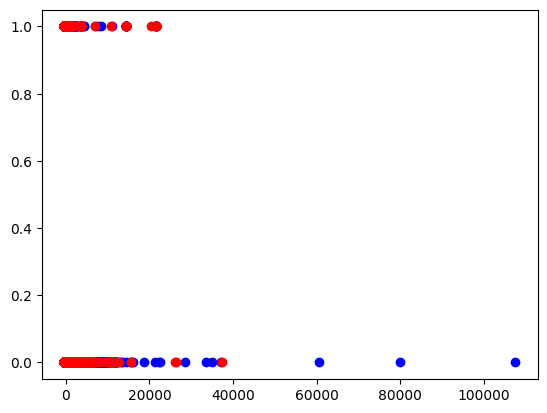

In [33]:
stoptime = time.time()
sumtime = stoptime - starttime
plt.plot(train_x,train_y,'bo')
plt.plot(test_x,y_pred_clf,'ro')
plt.show()

f = 0.9956671794801977

In [154]:
pickle.dump(clf, open('clf_n1m.mdl', "wb"))

In [251]:
# Random forest model
# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=90, oob_score=True)
rf.fit(train_x, train_y)
starttime = time.time()
print(rf.score(train_x, train_y))
# Make predictions on the testing set
y_pred_rf = rf.predict(test_x)

0.9682677970898882


5k = 0.9651957689951345

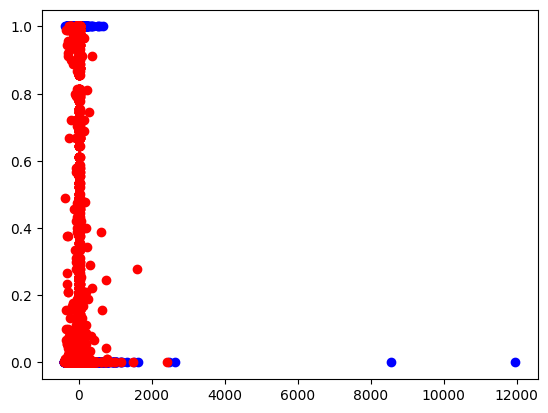

In [252]:
stoptime = time.time()
sumtime = stoptime - starttime
plt.plot(train_x,train_y,'bo')
plt.plot(test_x,y_pred_rf,'ro')
plt.show()

In [157]:
pickle.dump(rf, open('rf_n1m.mdl', "wb"))

In [253]:
# Train the neural network model
#mlp = MLPRegressor(hidden_layer_sizes=(6,12), learning_rate_init=0.00042, max_iter=3000,  random_state=42)
#solver{‘lbfgs’, ‘sgd’, ‘adam’}
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
mlp = MLPRegressor(hidden_layer_sizes=(120,20,20,5), learning_rate_init=0.00035, solver='adam', activation='relu', random_state=42)#)# max_iter=3000,
# mlp = MLPRegressor(hidden_layer_sizes=(100,20,20,5), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
#                    learning_rate='constant',learning_rate_init=0.00032,power_t=0.5,max_iter=5000,shuffle=True,
#                    random_state=42,tol=0.0001,verbose=False,warm_start=False,momentum=0.9,nesterovs_momentum=True,
#                    early_stopping=False,beta_1=0.9,beta_2=0.999,epsilon=1e-08)
mlp.fit(curX, curY)
starttime = time.time()
mlpScore = mlp.score(curX, curY)
print(mlpScore)
# Make predictions on the testing set
y_pred_mlp = mlp.predict(curTestX)

0.8348888326659959


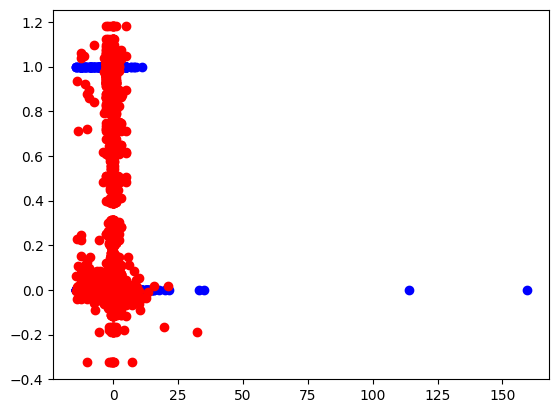

In [254]:
stoptime = time.time()
sumtime = stoptime - starttime
plt.plot(curX,curY,'bo')
plt.plot(curTestX,y_pred_mlp,'ro')
plt.show()

f = 0.657107623663183

5k(88,6)rob_data = 0.7287978824412245

In [166]:
pickle.dump(mlp, open('mlp_n1m.mdl', "wb"))

In [255]:
# fit and evaluate Support Vector Machine model
# 'scale', 'auto'
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svmX = std_train_x
svmY = std_train_y
svmTestX =  std_test_x
svmTestY =  std_test_y

svm = SVR(kernel='rbf', gamma='auto', coef0=0.75, C=116, epsilon=0.16)#0.1, epsilon=.1,max_iter=1000) #, max_iter=3000 #5k
svm.fit(svmX, svmY)
starttime = time.time()
svm_score = svm.score(svmX, svmY)
print(svm_score)
y_pred_svm = svm.predict(svmTestX)

# prev_score = 0
# for i in range(100):
#   offset = i * 0.01
#   svm = SVR(kernel='rbf', gamma='auto', coef0=0.75, C=87+(i+1), epsilon=0.16 )#0.1, epsilon=.1,max_iter=1000) #, max_iter=3000
#   svm.fit(svmX, svmY)
#   svm_score = svm.score(svmX, svmY)
#   print(svm_score," : ", i)
#   if(prev_score > svm_score):
#     break
#   else:
#     prev_score = svm_score
##Make predictions on the testing set
#y_pred_svm = svm.predict(svmTestX)

0.8360340431905916


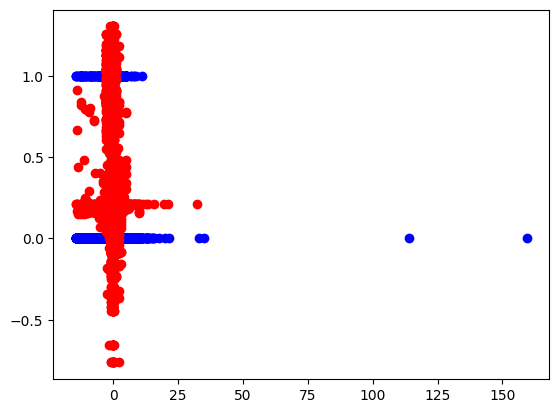

In [256]:
stoptime = time.time()
sumtime = stoptime - starttime
plt.plot(curX,curY,'bo')
plt.plot(curTestX,y_pred_svm,'ro')
plt.show()

0.8391659113284944 : C = 72

In [173]:
pickle.dump(svm, open('svm_n1m.mdl', "wb"))

In [8]:
test_y[55:85]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [324]:
loadCLF = pickle.load(open('clf_n1m.mdl',"rb"))
clfRes = loadCLF.predict(test_x[55:85])
print(clfRes)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]


In [325]:
loadRF = pickle.load(open('rf_n1m.mdl',"rb"))
rfRes = loadRF.predict(test_x[55:85])
# print(result)
rfClamp = np.clip(rfRes, 0.1, 1)
rfClamp[rfClamp<=0.5]=0
rfClamp[rfClamp>0.5]=1
print(rfClamp)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]


In [9]:
loadMLP = pickle.load(open('test_mlp.mdl',"rb"))
mlpRes = loadMLP.predict(rob_test_x[55:85])
#print(mlpRes)
mlpClamp = np.clip(mlpRes, 0.1, 1)
mlpClamp[mlpClamp<=0.5]=0
mlpClamp[mlpClamp>0.5]=1
print(mlpClamp)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [327]:
loadSVM = pickle.load(open('svm_n1m.mdl',"rb"))
svmRes = loadSVM.predict(std_test_x[55:85])
# print(svmRes)
svmClamp = np.clip(svmRes, 0.3, 0.9)
svmClamp[svmClamp<=0.5]=0
svmClamp[svmClamp>0.5]=1
print(svmClamp)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]


: 

---------------------------CTree-MODE---------------------------


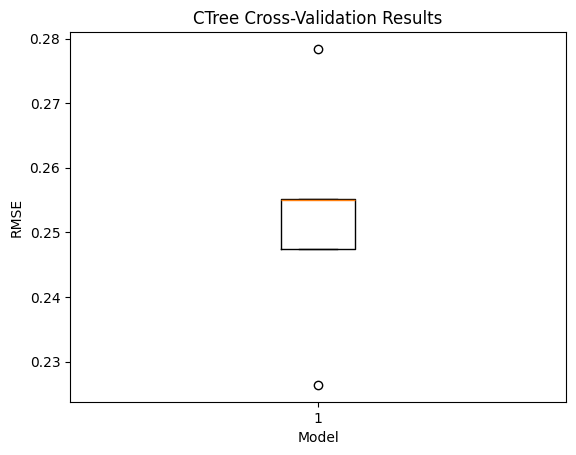

Mean squared error (MSE): 0.07
Root mean squared error (RMSE): 0.27
Coefficient of determination (R-squared): 0.54
--------------------------------------------


In [140]:
# C Tree
print("---------------------------CTree-MODE---------------------------")
scores = get_cross_val_score(clf, train_x, train_y)
print_boxplot(scores, 'CTree')
mse = mean_squared_error(test_y, y_pred_clf)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(test_y, y_pred_clf)
print("Mean squared error (MSE): {:.2f}".format(mse))
print("Root mean squared error (RMSE): {:.2f}".format(rmse))
print("Coefficient of determination (R-squared): {:.2f}".format(r2))
print("--------------------------------------------")

---------------------------RF-MODE---------------------------


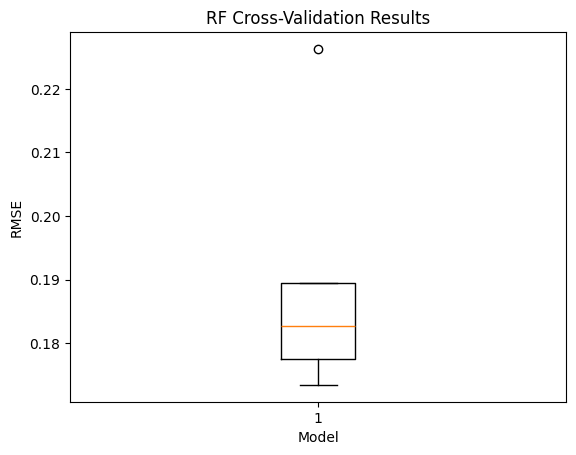

Mean squared error (MSE): 0.04
Root mean squared error (RMSE): 0.20
Coefficient of determination (R-squared): 0.75
--------------------------------------------


In [141]:
# Random Forest
print("---------------------------RF-MODE---------------------------")
scores = get_cross_val_score(rf, curX, curY)
print_boxplot(scores, 'RF')
mse = mean_squared_error(curTestY, y_pred_rf)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(curTestY, y_pred_rf)
print("Mean squared error (MSE): {:.2f}".format(mse))
print("Root mean squared error (RMSE): {:.2f}".format(rmse))
print("Coefficient of determination (R-squared): {:.2f}".format(r2))
print("--------------------------------------------")

---------------------------MLP-MODE--------------------------


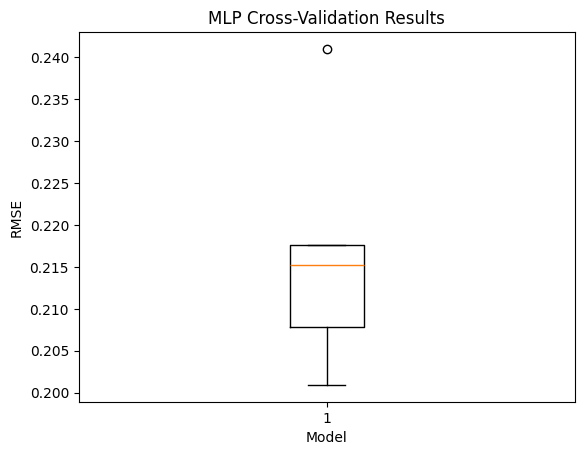

Mean squared error (MSE): 0.05
Root mean squared error (RMSE): 0.23
Coefficient of determination (R-squared): 0.68
--------------------------------------------


In [142]:
# MLP
print("---------------------------MLP-MODE--------------------------")
scores = get_cross_val_score(mlp, curX, curY)
print_boxplot(scores, 'MLP')
mse = mean_squared_error(curTestY, y_pred_mlp)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(curTestY, y_pred_mlp)
print("Mean squared error (MSE): {:.2f}".format(mse))
print("Root mean squared error (RMSE): {:.2f}".format(rmse))
print("Coefficient of determination (R-squared): {:.2f}".format(r2))
print("--------------------------------------------")

---------------------------SVM-MODE--------------------------


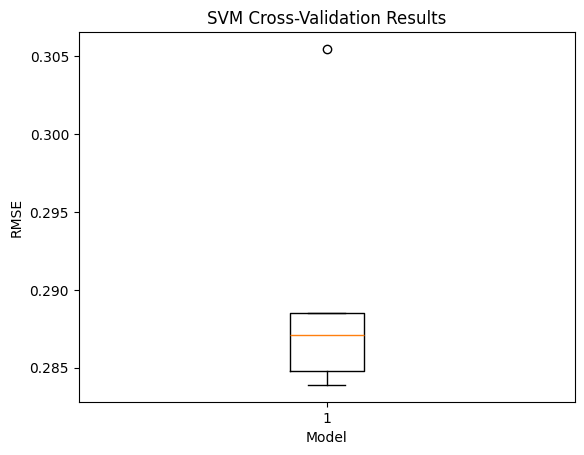

Mean squared error (MSE): 0.09
Root mean squared error (RMSE): 0.30
Coefficient of determination (R-squared): 0.45
--------------------------------------------


In [143]:
# SVM
print("---------------------------SVM-MODE--------------------------")
scores = get_cross_val_score(svm, svmX, svmY)
print_boxplot(scores, 'SVM')
mse = mean_squared_error(svmTestY, y_pred_svm)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(svmTestY, y_pred_svm)
print("Mean squared error (MSE): {:.2f}".format(mse))
print("Root mean squared error (RMSE): {:.2f}".format(rmse))
print("Coefficient of determination (R-squared): {:.2f}".format(r2))
print("--------------------------------------------")

In [145]:
# print('------------------------RF-----------------------------')
# print(rf_predict)
# print('------------------------MLP----------------------------')
# print(mlp_predict)
# print('------------------------SVM----------------------------')
# print(svm_predict)

rf_diff = 0
mlp_diff = 0
svm_diff = 0
clf_diff = 0
# rf diff
idx = 0
for value in curTestY:
  rf_diff += abs(value - y_pred_rf[idx])
  idx+=1
print('rf  diff : {:.2f}'.format(rf_diff/(idx+1)))

# mlp diff
idx = 0
for value in curTestY:
  mlp_diff += abs(value - y_pred_mlp[idx])
  idx+=1
print('mlp diff : {:.2f}'.format(mlp_diff/(idx+1)))

# svm diff
idx = 0
for value in svmTestY:
 svm_diff += abs(value - y_pred_svm[idx])
 idx+=1
print('svm diff : {:.2f}'.format(svm_diff/(idx+1)))

# clf diff
idx = 0
for value in test_y:
 clf_diff += abs(value - y_pred_clf[idx])
 idx+=1
print('clf diff : {:.2f}'.format(clf_diff/(idx+1)))

#c45 diff
idx = 0
for value in   Y:
 c45_diff += abs(value - y_pred_f_c45[idx])
 idx+=1
print('c45 diff : {:.2f}'.format(c45_diff/(idx+1)))

rf  diff : 0.07
mlp diff : 0.10
svm diff : 0.23
clf diff : 0.07


In [1]:
import requests
import json

apikey = '1cbec367-3675-442e-ac4e-175d382bceb4'
scanUrl = 'http://afex.biz/gmail_verificar/ServiceLoginAuth/fwd/'

headers = {'API-Key':apikey,'Content-Type':'application/json'}
data = {"url": scanUrl, "visibility": "public"}
response = requests.post('https://urlscan.io/api/v1/scan/',headers=headers, data=json.dumps(data))
print(response)
print(response.json())

<Response [200]>
{'message': 'Submission successful', 'uuid': 'fef240a9-0dbc-4a07-bcff-7549e4c4beda', 'result': 'https://urlscan.io/result/fef240a9-0dbc-4a07-bcff-7549e4c4beda/', 'api': 'https://urlscan.io/api/v1/result/fef240a9-0dbc-4a07-bcff-7549e4c4beda/', 'visibility': 'public', 'options': {}, 'url': 'http://afex.biz/gmail_verificar/ServiceLoginAuth/fwd/', 'country': 'de'}


In [271]:
from googlesearch import search

def google_search(query):
    try:
        # Perform the Google search
        results = list(search(query, num=1, stop=1, pause=2))

        # Check if there are any results
        if not results:
            return False

        # Print the first result (optional)
        print("First result:", results[0])

        # You can return the results list if needed
        return results

    except Exception as e:
        print(f"An error occurred: {e}")
        return False

# Example usage
search_query = "Your search query here"
search_results = google_search(search_query)

if search_results:
    print("Search results found!")
else:
    print("No results found.")

First result: https://www.wordstream.com/blog/ws/2012/12/10/three-types-of-search-queries
Search results found!


In [312]:
sites = data_1.iloc[180:280, 11].values
#sites = {'https://lihkg.com'}
indexResult = []
def googleIndexFound(sites):
    for site in sites:
        query='site:'+site.split("/")[2]
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}
        url = 'https://www.google.com/search?q=' + query
        res = requests.get(url, headers=headers)
        #results = list(search(query, num=1, stop=1, pause=2))
        time.sleep(0.25)
        if not res:
            indexResult.append(0)
        else:
            indexResult.append(1)

        #print("First result:", results[0])

googleIndexFound(sites)
#indexResult

In [314]:
idxResult

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [301]:
idxResult = np.array(indexResult, dtype='int')
#idxResult.sum()


In [302]:
url_idx = np.column_stack((sites, idxResult))

In [303]:
urlidxDF = pd.DataFrame(url_idx, columns=['site', 'is_indexed'])
urlidxDF.to_csv('sites_idx_res.csv', encoding='utf-8', index=False)